Train the model

In [2]:
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

messages = pd.read_csv('/content/spam.csv', encoding='latin-1')
messages = messages.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
messages.columns = ["label", "text"]
labels = np.where(messages["label"] == 'spam', 1, 0)
messages['text_clean'] = messages['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'],
                                                    messages['label'], test_size=0.2)

In [3]:
# Install Keras
!pip install -U keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [4]:
# Create tagged document objects to prepare to train the model
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

In [5]:
# Look at what a tagged documents look like
tagged_docs[1]

TaggedDocument(words=['can', 'you', 'use', 'foreign', 'stamps', 'for', 'whatever', 'you', 'send', 'them', 'off', 'for'], tags=[1])

In [6]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [7]:
# What happens if a singlw word like word2vec is passed?
d2v_model.infer_vector('text')

TypeError: Parameter doc_words of infer_vector() must be a list of strings (not a single string).

In [7]:
# What happens if pass a list of words?
d2v_model.infer_vector(['i', 'am', 'learning', 'nlp'])

array([-8.6601581e-03,  1.3191821e-02,  5.6003374e-03, -1.1450651e-02,
        4.4147461e-03, -2.4893301e-02,  1.2519725e-02,  4.2362794e-02,
       -1.7447915e-02, -1.2489193e-02, -3.4024972e-03, -3.3986039e-02,
       -7.7395444e-03,  1.4652736e-02,  4.7079879e-03, -1.4034410e-02,
        1.3912762e-02, -1.5725695e-02, -3.9503202e-04, -4.5509733e-02,
        8.0311690e-03,  1.5388231e-03,  1.5186818e-02, -1.6503172e-02,
       -4.7382130e-03,  2.4658316e-03, -2.1172047e-02, -1.3230438e-02,
       -1.5440730e-02, -1.1015978e-03,  2.4554100e-02,  1.0093248e-02,
        1.2811364e-02, -1.5539920e-02, -9.3334494e-03,  3.1445917e-02,
        4.7476892e-03, -1.7782571e-02, -1.4551222e-02, -3.2538351e-02,
       -1.2439119e-03, -8.6023090e-03,  3.3482688e-03,  2.1036374e-03,
        1.6522661e-02, -2.2477452e-02, -2.0829482e-02,  1.3855838e-03,
        1.4020535e-02,  1.5345229e-02,  8.7827211e-03, -1.9154742e-02,
        5.8643683e-03, -1.4609977e-03, -1.5129718e-02,  1.7278802e-02,
      

In [8]:
d2v_model.infer_vector(['convert', 'words', 'to', 'vectors'])

array([-0.01223306,  0.01118229,  0.01175572, -0.00755824,  0.00457528,
       -0.03044673,  0.00502528,  0.04079573, -0.01670617, -0.01249387,
       -0.01001569, -0.02821203, -0.00076877,  0.00645963,  0.00142222,
       -0.02037071,  0.01209997, -0.02801068, -0.00782052, -0.04074232,
        0.00868367,  0.00350061,  0.01261901, -0.01361596, -0.00162061,
       -0.00732411, -0.01386374, -0.00245008, -0.00082585, -0.00368795,
        0.02171001,  0.00760625, -0.00093406, -0.00037551,  0.0083774 ,
        0.01724363,  0.00127791, -0.01239452, -0.0015201 , -0.03229948,
        0.00418575, -0.01600346, -0.00117878, -0.00759539,  0.00390729,
       -0.01093511, -0.01927659,  0.00384712,  0.00663708,  0.00970949,
        0.00242615, -0.01565512,  0.00753131, -0.00221674, -0.01353111,
        0.02099145, -0.00100427, -0.00663619, -0.02269028,  0.00814364,
        0.00439164,  0.00619772, -0.00409867, -0.00525042, -0.01601342,
        0.01574091,  0.02444053,  0.01325429, -0.01660862,  0.02

In [9]:
y_train

1693     ham
2697     ham
3598     ham
4211    spam
4        ham
        ... 
4619     ham
5057     ham
1058     ham
5411     ham
1160     ham
Name: label, Length: 4457, dtype: object

In [10]:
vectors = [[d2v_model.infer_vector(words)] for words in X_test]

In [11]:
vectors[0]

[array([-0.01613902,  0.01298772,  0.01528452, -0.01423728,  0.00153459,
        -0.04249338,  0.01433888,  0.06140094, -0.02520353, -0.02312814,
        -0.01742075, -0.03982669, -0.0137312 ,  0.01936358,  0.00492522,
        -0.03091671,  0.02008833, -0.02317309, -0.01183406, -0.06669868,
         0.00391974,  0.00327196,  0.02001986, -0.01928823,  0.00295277,
        -0.00730535, -0.03093853, -0.01548847, -0.01208613, -0.00624053,
         0.04044772,  0.01116711,  0.00405615, -0.0097219 , -0.0041062 ,
         0.04031063,  0.00395801, -0.02399748, -0.00788835, -0.05817804,
        -0.00047907, -0.02021519,  0.00191878, -0.00508867,  0.02196719,
        -0.03111588, -0.02602266,  0.00729555,  0.01299957,  0.02142357,
         0.00936832, -0.02649931,  0.00420815, -0.00698537, -0.02740313,
         0.02782555, -0.00117185, -0.00237939, -0.03970742,  0.0102226 ,
         0.00982197,  0.00607212, -0.00669318, -0.00290333, -0.02536337,
         0.0382238 ,  0.02226092,  0.02875308, -0.0

In [12]:
!pip install -U tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
ERROR: pip's dependency res

In [13]:
import tensorflow as tf
print(tf.__version__)

2.16.1


### Prep Data for Modeling

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [42]:
X_train

1693    [was, gr, to, see, that, message, so, when, leaving, congrats, dear, what, school, and, wat, ur,...
2697                             [can, you, use, foreign, stamps, for, whatever, you, send, them, off, for]
3598                                                               [then, wat, doing, now, busy, wif, work]
4211                                  [missed, call, alert, these, numbers, called, but, left, no, message]
4                                     [nah, don, think, he, goes, to, usf, he, lives, around, here, though]
                                                       ...                                                 
4619                                                                        [this, is, long, fuckin, showr]
5057                                                   [geeeee, your, internet, is, really, bad, today, eh]
1058    [tell, me, they, re, female, how, re, you, throwing, in, we, re, deciding, what, all, to, get, now]
5411                        

In [43]:
# Use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [45]:
len(X_train_seq[1])

12

In [46]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [47]:
# What do these padded sequence looks like
X_train_seq_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  59, 511,   1,  84,  15, 138,
        19,  40, 553, 554, 108,  42, 450,   4, 124,  30, 865], dtype=int32)

In [48]:
import numpy as np

# Convert inputs to numerical types
X_train_seq_padded = np.array(X_train_seq_padded, dtype=np.float32)
X_test_seq_padded = np.array(X_test_seq_padded, dtype=np.float32)

# Verify the data types
print("X_train_seq_padded dtype:", X_train_seq_padded.dtype)
print("X_test_seq_padded dtype:", X_test_seq_padded.dtype)

X_train_seq_padded dtype: float32
X_test_seq_padded dtype: float32


In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert to numpy array if needed (depends on how your model.fit() function expects input)
y_train_encoded = np.array(y_train_encoded)

# Similarly, encode y_test
y_test_encoded = label_encoder.transform(y_test)

# Convert to float32
y_train_encoded = y_train_encoded.astype(np.float32)
y_test_encoded = y_test_encoded.astype(np.float32)

In [51]:
y_test_encoded.dtype

dtype('float32')

In [52]:
len(X_train_seq_padded)

4457

### Build Model

In [53]:
# Import the tools needed from keras and define functions to calculate recall and precision
import tensorflow as tf
import keras.backend as k
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_true * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

In [54]:
len(tokenizer.index_word)+1

6889

In [55]:
max_sequence_length = max(len(seq) for seq in X_train_seq_padded)

In [56]:
# Construct a Simple RNN model
model = Sequential()

model.add(Embedding(input_dim = len(tokenizer.index_word)+1, output_dim=32, input_shape=(max_sequence_length,)))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 50, 32)              │         220,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,857 (897.88 KB)

 Trainable params: 229,857 (897.88 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

### Train the Model

In [58]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train_encoded,
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test_encoded))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.8578 - loss: 0.4234 - precision_m: 1.1867 - recall_m: 1.3245 - val_accuracy: 0.9785 - val_loss: 0.0836 - val_precision_m: 3.8857 - val_recall_m: 3.4571
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9798 - loss: 0.0744 - precision_m: 4.1630 - recall_m: 3.8054 - val_accuracy: 0.9865 - val_loss: 0.0463 - val_precision_m: 3.9143 - val_recall_m: 3.7714
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 0.9915 - loss: 0.0285 - precision_m: 4.3750 - recall_m: 4.2323 - val_accuracy: 0.9848 - val_loss: 0.0462 - val_precision_m: 3.9143 - val_recall_m: 3.6571
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9931 - loss: 0.0220 - precision_m: 4.7037 - recall_m: 4.6011 - val_accuracy: 0.9857 - val_loss: 0.0533 - val_precision_m: 3.9143 - val_recall_m: 3.5714
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9986 - loss: 0.0077 - precision_m: 4.3098 - recall_m: 4.

### Visualize the Prediction

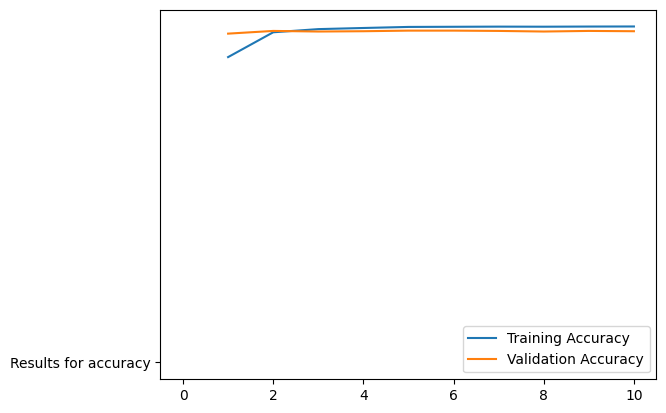

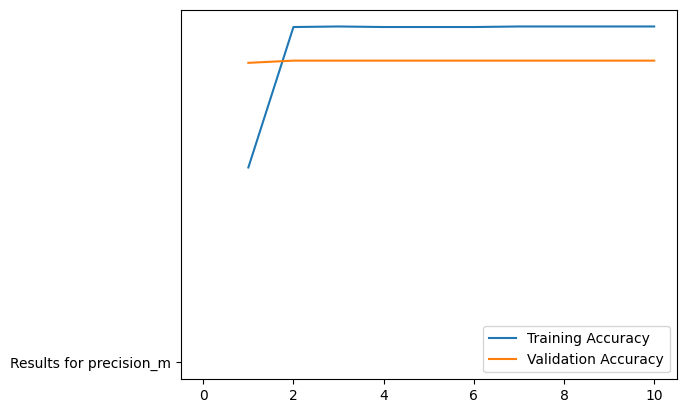

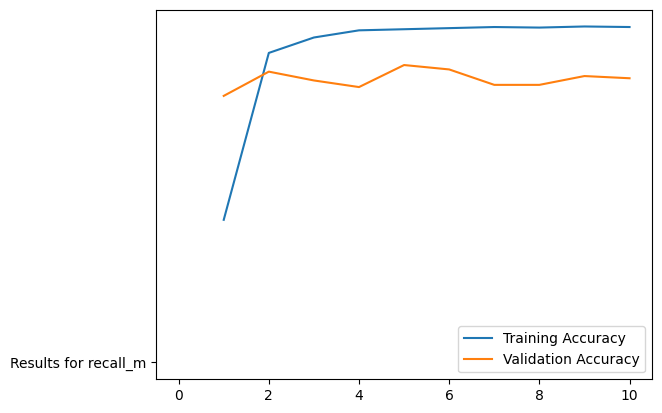

In [60]:
# Plot the evaluation metrics by each epoch for the model to see if there are over or underfitting
import matplotlib .pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
  acc= history.history[i]
  val_acc = history.history['val_{}'.format(i)]
  epochs = range(1, len(acc)+1)

  plt.figure()
  plt.plot(epochs, acc, label='Training Accuracy')
  plt.plot(epochs, val_acc, label = 'Validation Accuracy')
  plt.plot('Results for {}'.format(i))
  plt.legend()
  plt.show()